In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer     
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import joblib
import pickle

In [ ]:
print(stopwords.words("english"))       

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Processing


In [3]:
df=pd.read_csv("Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

<Axes: >

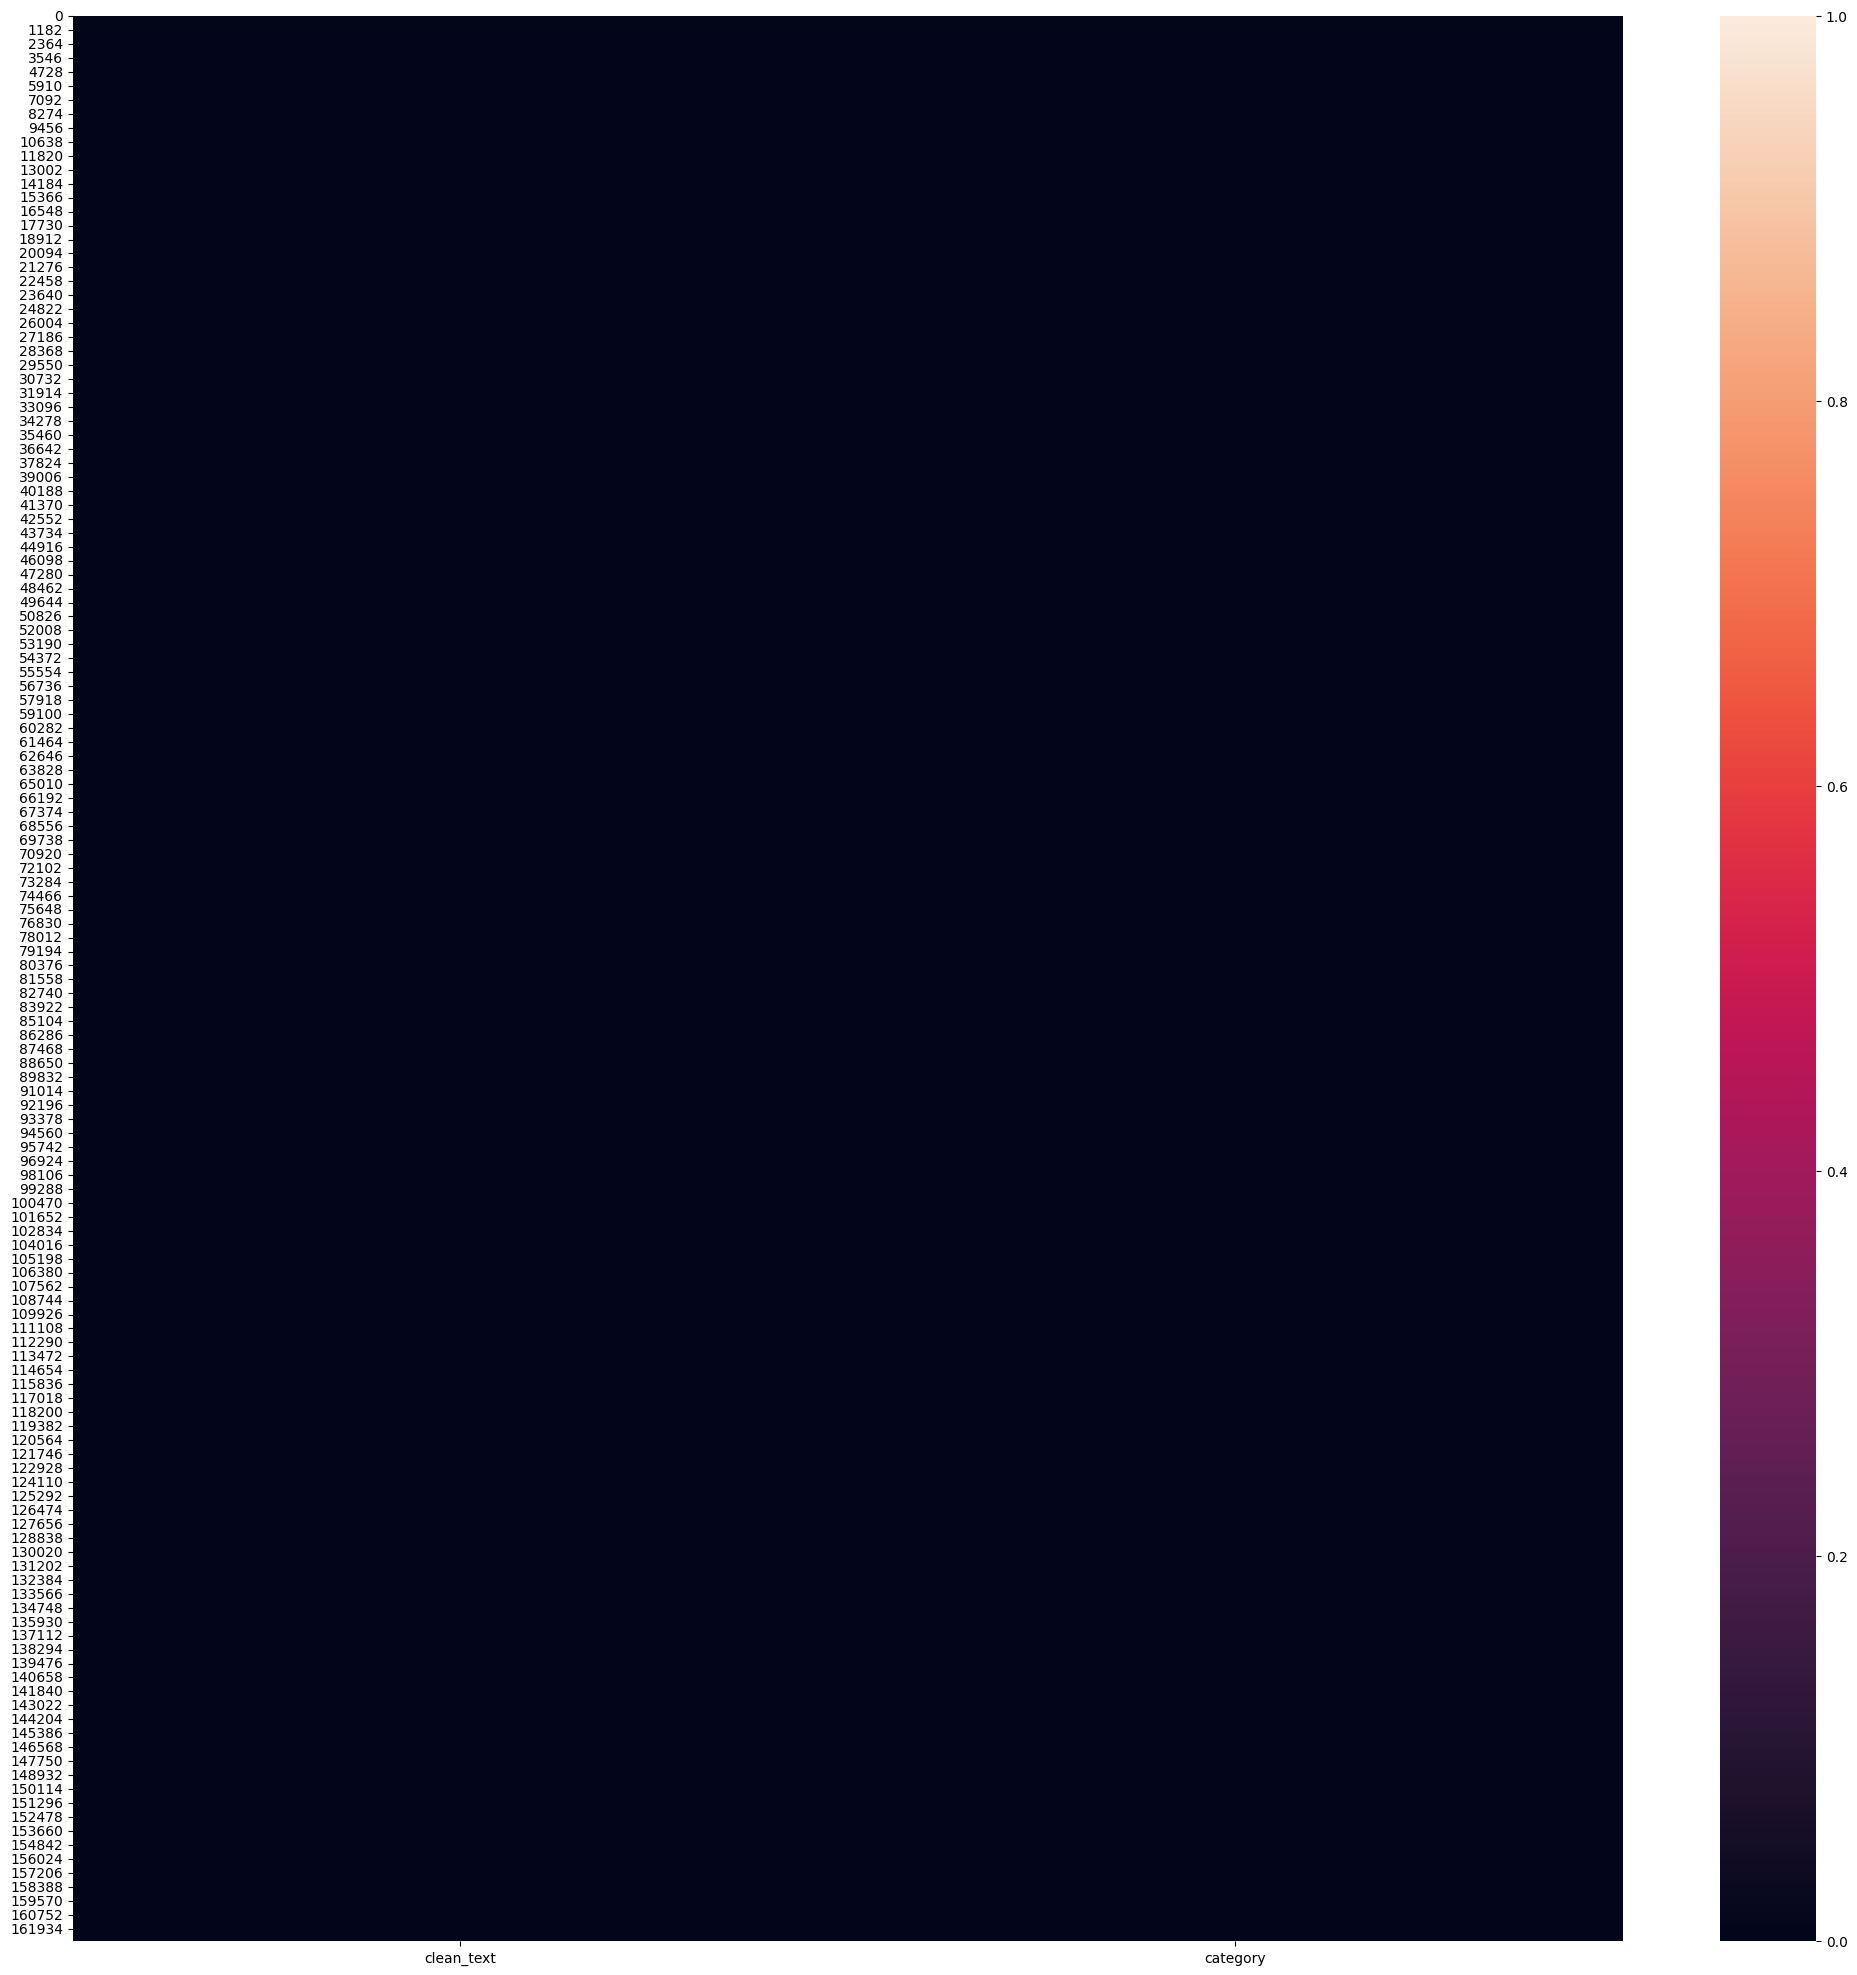

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [9]:
updated_data=df.dropna()
print(updated_data)

                                               clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162969 rows x 2 columns]


In [10]:
print(updated_data.shape)

(162969, 2)


<Axes: >

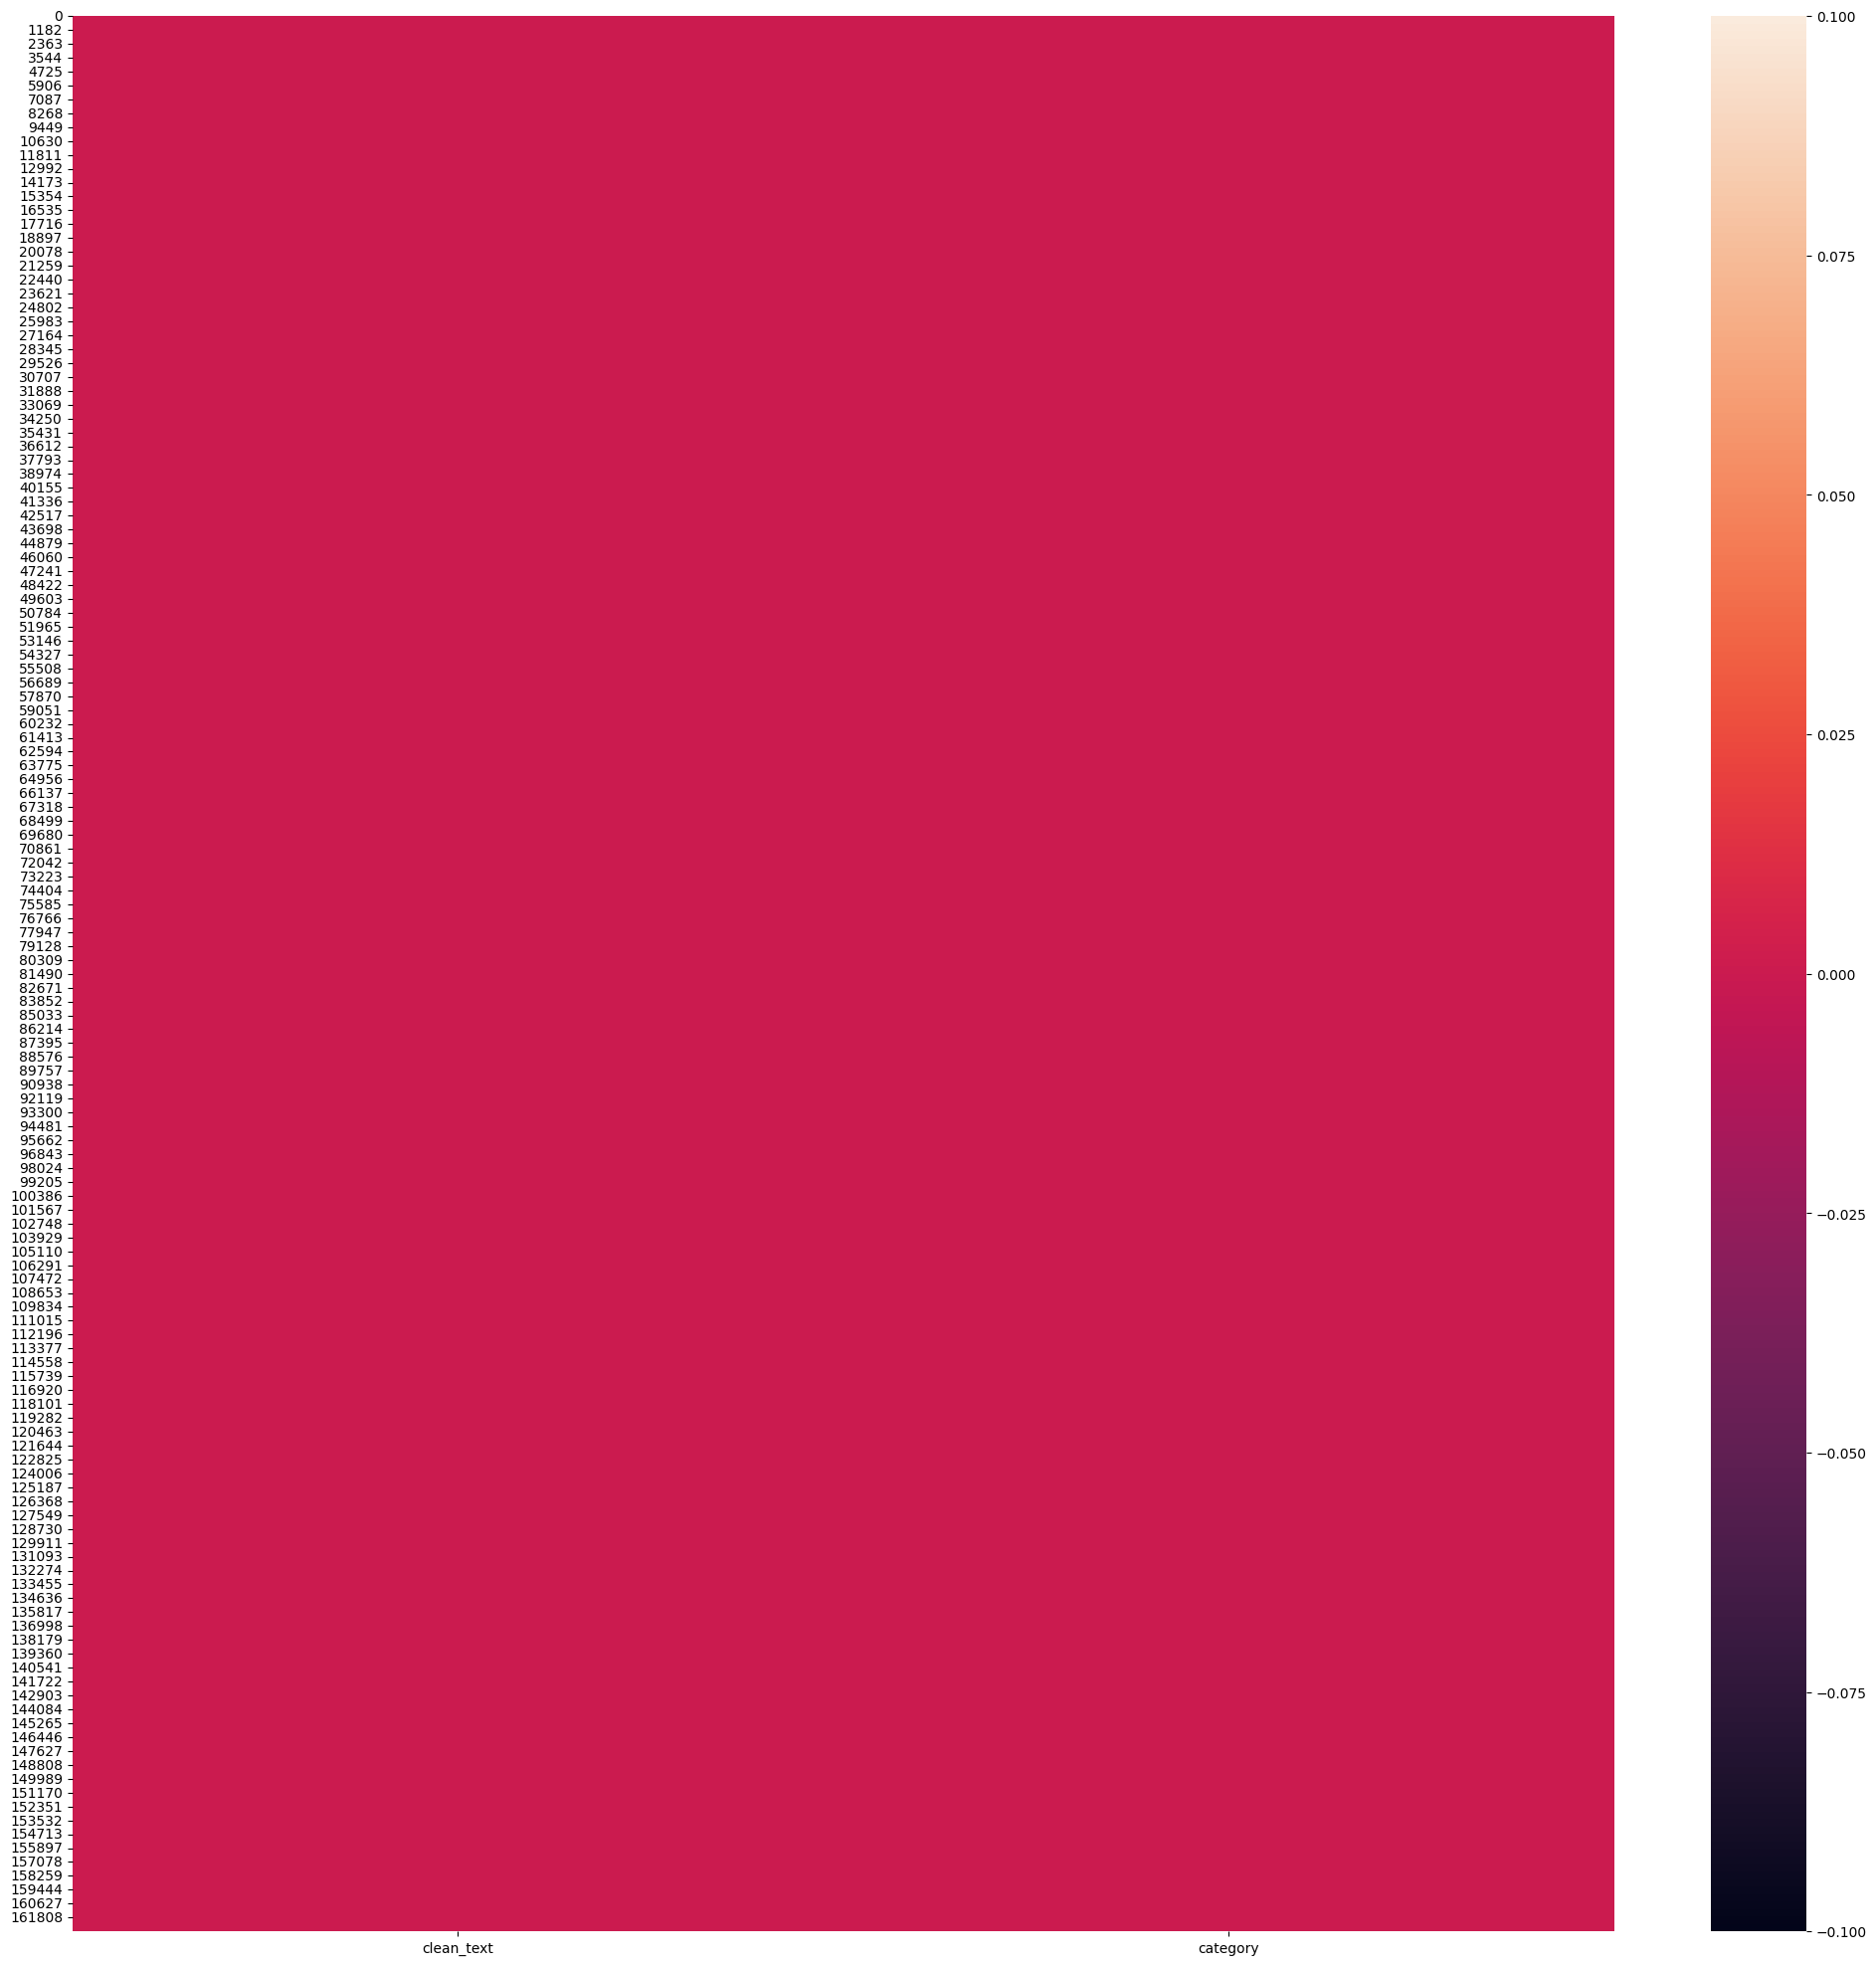

In [11]:
plt.figure(figsize=(25,25))
sns.heatmap(updated_data.isnull())

In [ ]:
a=[]
a=updated_data["category"].value_counts()
pos=a[1]
neu=a[0]
neg=a[-1]

print(pos)
print(neu)
print(neg)
print(a)
# 162969

72249
55211
35509
category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


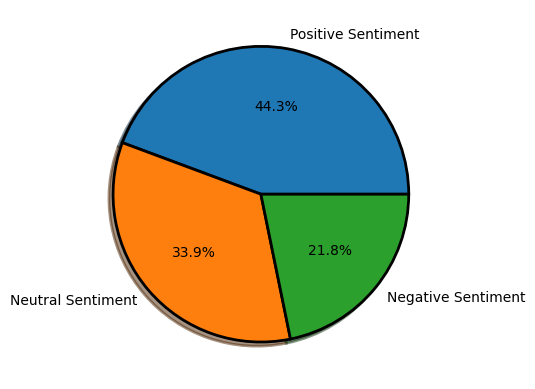

In [13]:
rows=updated_data.shape[0]
classes=["Positive Sentiment","Neutral Sentiment","Negative Sentiment"]
class_weightage=[pos,neu,neg]

border={"linewidth":2,"width":1,"edgecolor":"k"}

plt.pie(class_weightage,labels=classes,autopct="%0.1f%%",shadow=True,wedgeprops=border)
plt.show()

In [ ]:
data=updated_data.where((pd.notnull(df))," ")
x=data["clean_text"]
y=data["category"]
print(x)
print(y)

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object
0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162969, dtype: float64


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [16]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(162969,)
(130375,)
(32594,)


In [17]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(162969,)
(130375,)
(32594,)


In [18]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [19]:
model=LogisticRegression(max_iter=1000)

In [20]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1625891 stored elements and shape (130375, 92918)>
  Coords	Values
  (0, 15357)	0.25688937452410865
  (0, 33149)	0.2592135666228486
  (0, 40030)	0.23531317997760215
  (0, 57881)	0.15381029705009372
  (0, 86368)	0.17495578551588345
  (0, 54348)	0.037431403932313555
  (0, 25442)	0.13572993758017887
  (0, 8962)	0.16888843434003423
  (0, 89057)	0.1814066597299981
  (0, 19790)	0.2711278609559735
  (0, 88645)	0.22264767603301627
  (0, 19283)	0.3509452093798808
  (0, 60566)	0.15269587413478342
  (0, 64106)	0.3346276253345043
  (0, 61988)	0.3638972044858536
  (0, 49907)	0.22352289654520516
  (0, 24512)	0.29848662499222367
  (0, 28429)	0.15135024100781697
  (1, 86368)	0.23911680906674007
  (1, 54348)	0.05115851322544844
  (1, 53695)	0.3198890962684722
  (1, 37229)	0.2526897374853476
  (1, 50018)	0.2628254926505049
  (1, 63139)	0.15634960896664055
  (1, 40970)	0.12717449478792758
  :	:
  (130373, 79100)	0.3202288135182643
  (130374, 4

In [21]:
model.fit(x_train_features,y_train)


LogisticRegression(max_iter=1000)

In [22]:
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)
print(accuracy_on_training_data)

0.8956318312559923


In [23]:
prediction_on_testing_data=model.predict(x_test_features)
accuracy_on_testing_data=accuracy_score(y_test,prediction_on_testing_data)
print(accuracy_on_testing_data)

0.8584095232251334


In [ ]:
joblib.dump(feature_extraction, 'tfidf_vectorizer.pkl')
pickle.dump(feature_extraction,open("X_sentiment_analysis.pkl","wb"))

In [25]:
cm = confusion_matrix(y_test, prediction_on_testing_data)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 5253   864  1007]
 [  127 10429   422]
 [  643  1552 12297]]


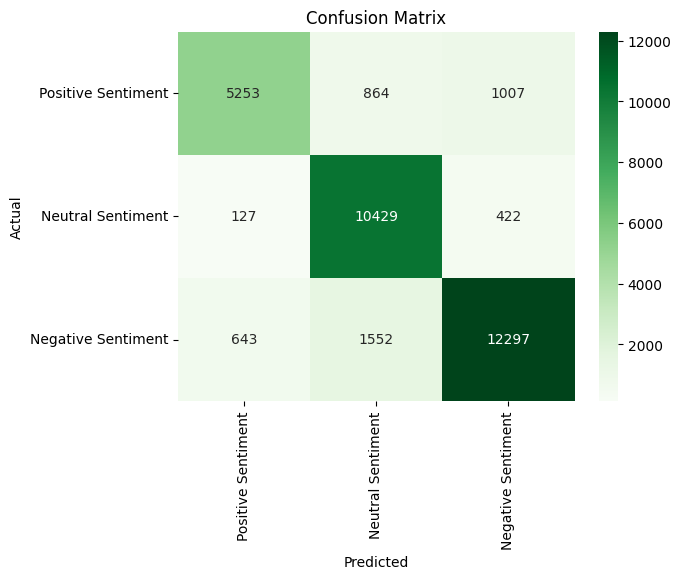

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=classes, yticklabels=classes)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

In [27]:
input_sentiment=[]
for i in range(1):
    x=input("Enter the message:")  
    input_sentiment.append(x)
input_data_features=feature_extraction.transform(input_sentiment)

tweet=model.predict(input_data_features)
if(tweet[0]==1):
    print(input_sentiment)
    print("Positive Sentiment")
elif(tweet[0]==0):
    print(input_sentiment)
    print("Neutral Sentiment")
elif(tweet[0]==-1):
    print(input_sentiment)
    print("Negative Sentiment")